In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/National_Stock_Exchange_of_India_Ltd.csv')
df.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [3]:
df.isnull().sum()

Symbol             0
Open               0
High               0
Low                0
LTP                0
Chng               0
% Chng             0
Volume (lacs)      0
Turnover (crs.)    0
52w H              0
52w L              0
365 d % chng       0
30 d % chng        0
dtype: int64

In [6]:
df=df.drop('Symbol',axis=1)
df.head()

,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [8]:
columns=["Open","High", "Low","LTP","Turnover (crs.)","52w H","52w L"]
for col in columns:
    df[col]=df[col].apply(lambda z: z.replace(',', ''))
    df[col]=df[col].apply(lambda z: float(z))

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(df)
x


array([[-4.49492869e-01, -4.49631152e-01, -4.52680614e-01,
        -4.54528686e-01,  1.40396898e-01, -1.24138641e+00,
         1.00883328e-02, -7.60652087e-02, -4.41312794e-01,
        -4.64971178e-01,  1.02795400e+00,  2.15178108e-01],
       [ 2.31730974e-02,  2.99763954e-02,  3.63615804e-02,
         4.05438455e-02,  3.95405152e-01,  1.03022469e+00,
        -6.59044602e-01, -5.07097562e-01,  1.11930910e-02,
        -2.32992731e-02,  1.20514270e-01,  1.86240583e+00],
       [-4.65777830e-01, -4.67826020e-01, -4.63540220e-01,
        -4.65562081e-01,  3.17107715e-01,  5.66770744e-02,
         3.37899703e-01,  2.34479138e-01, -4.47238466e-01,
        -4.18070222e-01, -8.38570573e-01, -2.47534710e+00],
       [ 7.72552518e-02,  7.31467668e-02,  8.34610074e-02,
         8.07953059e-02,  8.31438317e-02,  4.75528956e-01,
        -7.33296633e-01, -9.33698549e-01,  1.60012615e-01,
         2.12186855e-01, -8.62635572e-01, -9.67119191e-01],
       [ 2.85776156e+00,  2.84006499e+00,  2.8168731

Text(0.5, 1.0, 'elbow method')

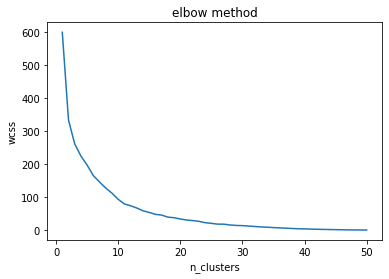

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,51):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
plt.plot(range(1,51),wcss)
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('elbow method')

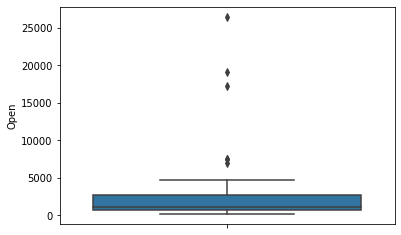

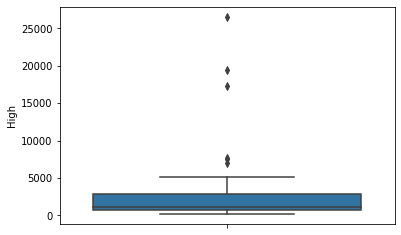

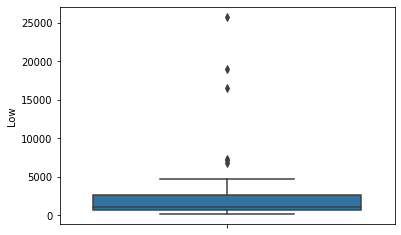

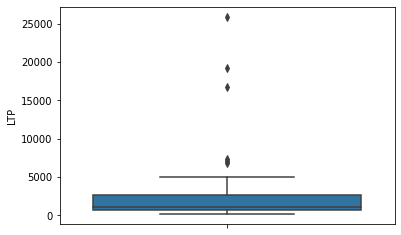

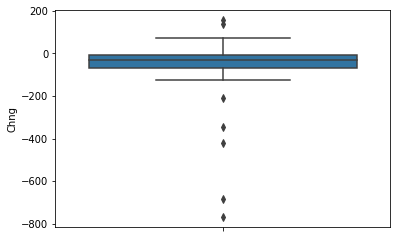

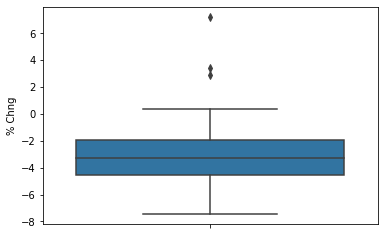

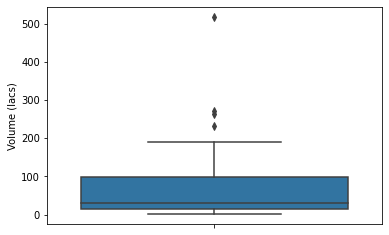

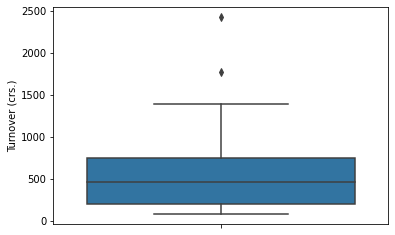

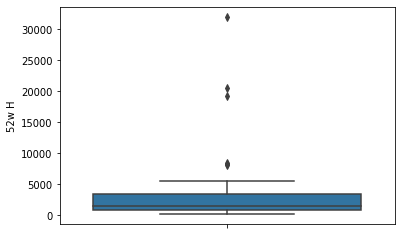

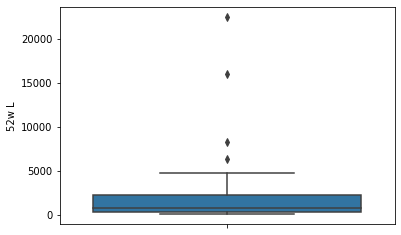

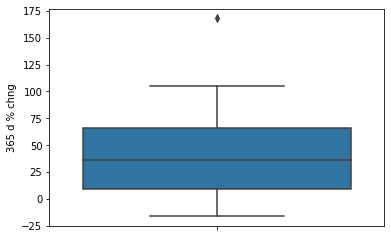

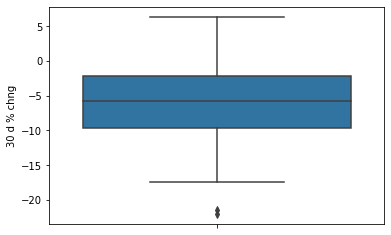

In [14]:
import seaborn as sns
columns=df.columns
for col in columns:
    plt.figure()
    sns.boxplot(y=df[col])

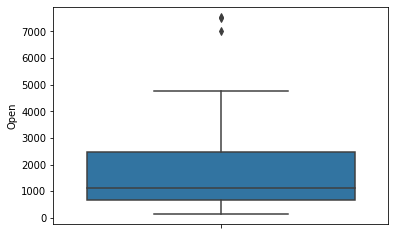

In [15]:
df.drop(df[df["Open"]>15000].index,axis=0,inplace=True)
sns.boxplot(y=df["Open"])

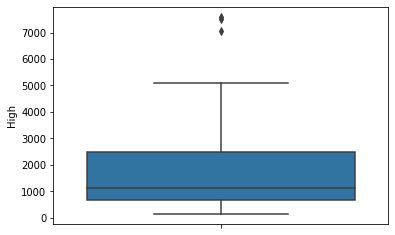

In [16]:
df.drop(df[df["High"]>15000].index,axis=0,inplace=True)
sns.boxplot(y=df["High"])

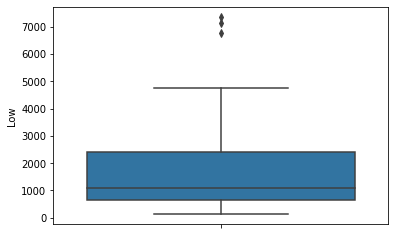

In [17]:
df.drop(df[df["Low"]>15000].index,axis=0,inplace=True)
sns.boxplot(y=df["Low"])

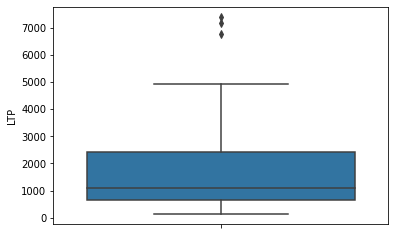

In [18]:
df.drop(df[df["LTP"]>15000].index,axis=0,inplace=True)
sns.boxplot(y=df["LTP"])

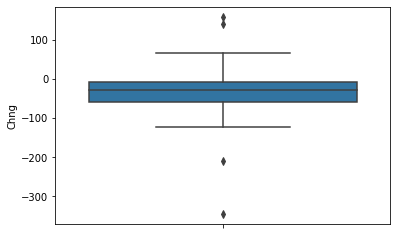

In [19]:
df.drop(df[df["Chng"]<-400].index,axis=0,inplace=True)
sns.boxplot(y=df["Chng"])

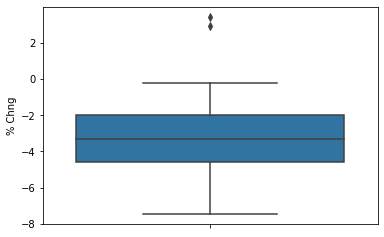

In [20]:
df.drop(df[df["% Chng"]>4].index,axis=0,inplace=True)
sns.boxplot(y=df["% Chng"])

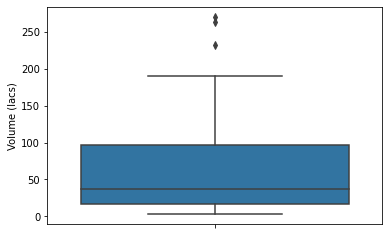

In [21]:
df.drop(df[df["Volume (lacs)"]>400].index,axis=0,inplace=True)
sns.boxplot(y=df["Volume (lacs)"])

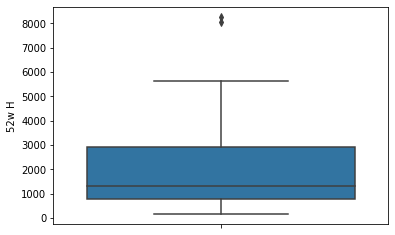

In [22]:
df.drop(df[df["52w H"]>15000].index,axis=0,inplace=True)
sns.boxplot(y=df["52w H"])

Text(0.5, 1.0, 'elbow method')

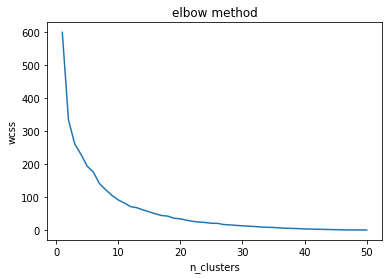

In [23]:
wcss=[]
for i in range(1,51):
    model=KMeans(n_clusters=i)
    clusters=model.fit_predict(x)
    wcss.append(model.inertia_)
plt.plot(range(1,51),wcss)
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('elbow method')

In [28]:
kmeans=KMeans(n_clusters = 2,init = 'k-means++',max_iter = 300,n_init = 10)             
kmeans.fit(x)
clusters=kmeans.fit_predict(x)
print(clusters)
df['Clusters'] = clusters 
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], c = 'red', label = 'Cluster1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], c = 'blue', label = 'Cluster2')
plt.xlabel('365 d % chng') 
plt.ylabel('30 d % chng') 
plt.legend() 

plt.show()

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]


ValueError: ignored